In [1]:
import numpy as np

In [2]:
import pandas as pd

In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [7]:
df=pd.read_csv("C:\\Users\\Lenovo\\Downloads\\BreastCancerGlobal.csv")

In [8]:
df

Country         Region HDI_Category  Population  \
0        United Kingdom           Asia         High   191540888   
1               Nigeria  North America         High   129793398   
2          Saudi Arabia         Africa          Low     3532234   
3             Australia  South America          Low    41960151   
4                France  South America       Medium    96709040   
...                 ...            ...          ...         ...   
1989165          Canada  North America         High   188110940   
1989166       Indonesia        Oceania       Medium    10939787   
1989167           China         Europe       Medium    15240591   
1989168  United Kingdom        Oceania          Low   150476874   
1989169           Japan         Europe       Medium    30377158   

         Screening_Rate  Median_Age  Urbanization_Rate  \
0                 66.17          33              67.05   
1                 63.18          30              65.86   
2                 12.91          42              69.01   
3                 12.64          38              26.66   
4                 44.87          42              41.22   
...                 ...         ...                ...   
1989165           43.52          35              27.84   
1989166           35.49          41              77.07   
1989167           80.23          32              25.29   
1989168           17.19          42              78.31   
1989169           48.22          24              33.22   

         Healthcare_Expenditure  GDP_Per_Capita  Obesity_Rate  ...  \
0                          5873           13759         25.52  ...   
1                           604           35571         15.78  ...   
2                          9138           37653         12.11  ...   
3                          3767            1947         30.66  ...   
4                          4364           12059         21.48  ...   
...                         ...             ...           ...  ...   
1989165                    4483           39926         23.95  ...   
1989166                    7735           34643         41.08  ...   
1989167                    5085           35318         20.52  ...   
1989168                    2376           16260         15.81  ...   
1989169                    8137           23960         25.10  ...   

         Average_Diagnosis_Age  Survival_Rate  Access_To_Care  \
0                           47          80.36           48.78   
1                           42          96.64           35.50   
2                           64          68.65           86.96   
3                           57          73.11           25.97   
4                           66          50.85           76.07   
...                        ...            ...             ...   
1989165                     53          81.59           64.76   
1989166                     31          71.66           67.74   
1989167                     52          79.24           40.52   
1989168                     41          90.73           71.35   
1989169                     35          97.90           63.74   

         Education_Level  Women_Population  Breast_Cancer_Cases  \
0                Primary          95111187               205111   
1                Primary          64449968               138989   
2              Secondary           1753959                 3782   
3               Tertiary          20835654                44933   
4                Primary          48021661               103560   
...                  ...               ...                  ...   
1989165         Tertiary          93408018               201438   
1989166        Secondary           5432240                11714   
1989167        Secondary           7567839                16320   
1989168        Secondary          74720516               161138   
1989169        Secondary          15084025                32529   

         Breast_Cancer_Deaths  Cases_Per_100K Deaths_Per_100K  Mortality_Rate  
0      

In [11]:
display(df.info())
display(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989170 entries, 0 to 1989169
Data columns (total 25 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   Country                 object 
 1   Region                  object 
 2   HDI_Category            object 
 3   Population              int64  
 4   Screening_Rate          float64
 5   Median_Age              int64  
 6   Urbanization_Rate       float64
 7   Healthcare_Expenditure  int64  
 8   GDP_Per_Capita          int64  
 9   Obesity_Rate            float64
 10  Smoking_Rate            float64
 11  Alcohol_Consumption     float64
 12  Physical_Activity_Rate  float64
 13  Family_History_Rate     float64
 14  Breastfeeding_Rate      float64
 15  Average_Diagnosis_Age   int64  
 16  Survival_Rate           float64
 17  Access_To_Care          float64
 18  Education_Level         object 
 19  Women_Population        int64  
 20  Breast_Cancer_Cases     int64  
 21  Breast_Cancer_Deaths    int64  

None

Population  Screening_Rate    Median_Age  Urbanization_Rate  \
count  1.989170e+06    1.989170e+06  1.989170e+06       1.989170e+06   
mean   1.004545e+08    5.001310e+01  3.450089e+01       5.500497e+01   
std    5.744319e+07    2.308906e+01  8.657112e+00       2.021857e+01   
min    1.000079e+06    1.000000e+01  2.000000e+01       2.000000e+01   
25%    5.066463e+07    3.003000e+01  2.700000e+01       3.749000e+01   
50%    1.004995e+08    5.002000e+01  3.500000e+01       5.500000e+01   
75%    1.501670e+08    6.999000e+01  4.200000e+01       7.254000e+01   
max    2.000000e+08    9.000000e+01  4.900000e+01       9.000000e+01   

       Healthcare_Expenditure  GDP_Per_Capita  Obesity_Rate  Smoking_Rate  \
count            1.989170e+06    1.989170e+06  1.989170e+06  1.989170e+06   
mean             5.046636e+03    2.550817e+04  2.750320e+01  2.249372e+01   
std              2.857664e+03    1.414696e+04  1.299669e+01  1.010476e+01   
min              1.000000e+02    1.000000e+03  5.000000e+00  5.000000e+00   
25%              2.572000e+03    1.326000e+04  1.623000e+01  1.375000e+01   
50%              5.046000e+03    2.550600e+04  2.750000e+01  2.249000e+01   
75%              7.519000e+03    3.775200e+04  3.876000e+01  3.124000e+01   
max              9.999000e+03    4.999900e+04  5.000000e+01  4.000000e+01   

       Alcohol_Consumption  Physical_Activity_Rate  ...  Breastfeeding_Rate  \
count         1.989170e+06            1.989170e+06  ...        1.989170e+06   
mean          7.498512e+00            5.001067e+01  ...        4.997499e+01   
std           4.327977e+00            1.731765e+01  ...        2.308582e+01   
min           0.000000e+00            2.000000e+01  ...        1.000000e+01   
25%           3.750000e+00            3.502000e+01  ...        3.001000e+01   
50%           7.500000e+00            5.002000e+01  ...        4.995000e+01   
75%           1.125000e+01            6.501000e+01  ...        6.995000e+01   
max           1.500000e+01            8.000000e+01  ...        9.000000e+01   

       Average_Diagnosis_Age  Survival_Rate  Access_To_Care  Women_Population  \
count           1.989170e+06   1.989170e+06    1.989170e+06      1.989170e+06   
mean            4.950404e+01   7.449695e+01    5.496966e+01      4.988150e+07   
std             1.153358e+01   1.415565e+01    2.020653e+01      2.852389e+07   
min             3.000000e+01   5.000000e+01    2.000000e+01      4.965970e+05   
25%             4.000000e+01   6.222000e+01    3.747000e+01      2.515793e+07   
50%             5.000000e+01   7.450000e+01    5.494000e+01      4.990386e+07   
75%             5.900000e+01   8.677000e+01    7.246000e+01      7.456663e+07   
max             6.900000e+01   9.900000e+01    9.000000e+01      9.931161e+07   

       Breast_Cancer_Cases  Breast_Cancer_Deaths  Cases_Per_100K  \
count         1.989170e+06          1.989170e+06    1.989170e+06   
mean          1.075712e+05          2.001801e+04    2.156489e+02   
std           6.151302e+04          1.144729e+04    7.198228e-03   
min           1.070000e+03          1.990000e+02    2.154600e+02   
25%           5.425400e+04          1.009600e+04    2.156500e+02   
50%           1.076190e+05          2.002700e+04    2.156500e+02   
75%           1.608058e+05          2.992500e+04    2.156500e+02   
max           2.141690e+05          3.985500e+04    2.156500e+02   

       Deaths_Per_100K  Mortality_Rate  
count     1.989170e+06    1.989170e+06  
mean      4.012834e+01    1.860931e+01  
std       8.705428e-03    3.858376e-03  
min       3.990000e+01    1.852000e+01  
25%       4.013000e+01    1.861000e+01  
50%       4.013000e+01    1.861000e+01  
75%       4.013000e+01    1.861000e+01  
max       4.013000e+01    1.861000e+01  

[8 rows x 21 columns]

In [13]:
display(df.isnull().sum())

Country                   0
Region                    0
HDI_Category              0
Population                0
Screening_Rate            0
Median_Age                0
Urbanization_Rate         0
Healthcare_Expenditure    0
GDP_Per_Capita            0
Obesity_Rate              0
Smoking_Rate              0
Alcohol_Consumption       0
Physical_Activity_Rate    0
Family_History_Rate       0
Breastfeeding_Rate        0
Average_Diagnosis_Age     0
Survival_Rate             0
Access_To_Care            0
Education_Level           0
Women_Population          0
Breast_Cancer_Cases       0
Breast_Cancer_Deaths      0
Cases_Per_100K            0
Deaths_Per_100K           0
Mortality_Rate            0
dtype: int64

In [15]:
categorical_cols = df.select_dtypes(include=["object"]).columns
print("Encoding categorical variables...")
for col in categorical_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


Encoding categorical variables...


In [16]:
numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Scaling numerical features...")
df[numerical_cols] = StandardScaler().fit_transform(df[numerical_cols])


Scaling numerical features...


In [18]:
display(df.head())
print("Data Preprocessing Completed Successfully!")


Country    Region  HDI_Category  Population  Screening_Rate  Median_Age  \
0  1.387968 -0.878954     -1.225020    1.585678        0.699764   -0.173371   
1  0.278770  0.292119     -1.225020    0.510746        0.570266   -0.519907   
2  0.694719 -1.464490     -0.000326   -1.687272       -1.606956    0.866237   
3 -1.523677  1.463192     -0.000326   -1.018299       -1.618650    0.404189   
4 -0.691778  1.463192      1.224369   -0.065203       -0.222750    0.866237   

   Urbanization_Rate  Healthcare_Expenditure  GDP_Per_Capita  Obesity_Rate  \
0           0.595741                0.289175       -0.830509     -0.152593   
1           0.536884               -1.554639        0.711307     -0.902015   
2           0.692682                1.431717        0.858476     -1.184394   
3          -1.401928               -0.447791       -1.665459      0.242892   
4          -0.681798               -0.238879       -0.950676     -0.463442   

   ...  Average_Diagnosis_Age  Survival_Rate  Access_To_Care  Education_Level  \
0  ...              -0.217109       0.414184       -0.306320        -1.223988   
1  ...              -0.650625       1.564255       -0.963534        -1.223988   
2  ...               1.256848      -0.413047        1.583169         0.000617   
3  ...               0.649925      -0.097979       -1.435163         1.225222   
4  ...               1.430255      -1.670496        1.044234        -1.223988   

   Women_Population  Breast_Cancer_Cases  Breast_Cancer_Deaths  \
0          1.585678             1.585678              1.585702   
1          0.510746             0.510751              0.510775   
2         -1.687272            -1.687272             -1.687299   
3         -1.018299            -1.018292             -1.018320   
4         -0.065203            -0.065209             -0.065169   

   Cases_Per_100K  Deaths_Per_100K  Mortality_Rate  
0        0.155497         0.190529        0.177911  
1        0.155497         0.190529        0.177911  
2       -2.622965        -5.553015       -5.005619  
3        0.155497         0.190529        0.177911  
4        0.155497         0.190529        0.177911  

[5 rows x 25 columns]

Data Preprocessing Completed Successfully!


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
def remove_outliers(df, numerical_cols):
    Q1 = df[numerical_cols].quantile(0.25)
    Q3 = df[numerical_cols].quantile(0.75)
    IQR = Q3 - Q1
    df_clean = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
    print(f"Outliers removed. New dataset size: {df_clean.shape}")
    return df_clean

In [25]:
selected_columns = [
    "Population", "Screening_Rate", "Median_Age", "Healthcare_Expenditure",
    "Survival_Rate", "Obesity_Rate", "Smoking_Rate", "Alcohol_Consumption", "Physical_Activity_Rate", "Education_Level","Breast_Cancer_Deaths"
]

In [27]:
df = remove_outliers(df, selected_columns)

Outliers removed. New dataset size: (1989170, 25)


In [28]:
scaler = StandardScaler()
df = df.copy()
df[selected_columns] = scaler.fit_transform(df[selected_columns])

In [31]:
df_sample = df.sample(n=10000, random_state=42) 

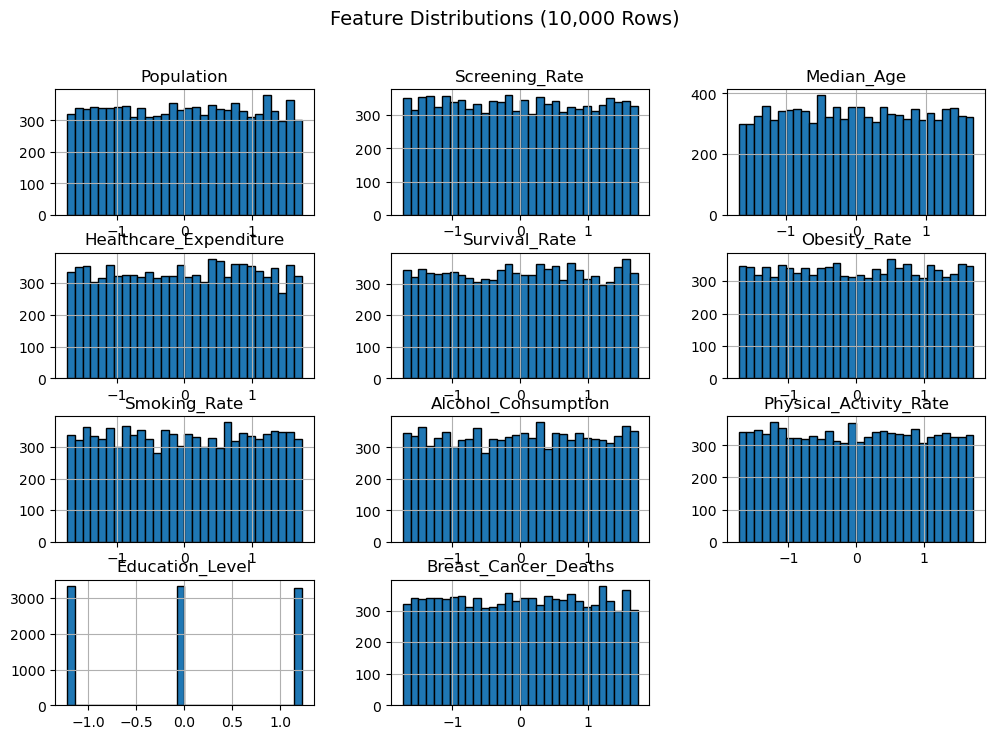

In [39]:
df_sample[selected_columns].hist(figsize=(12, 8), bins=30, edgecolor='black')
plt.suptitle("Feature Distributions (10,000 Rows)", fontsize=14)
plt.show()

Displaying boxplots for selected numerical features...


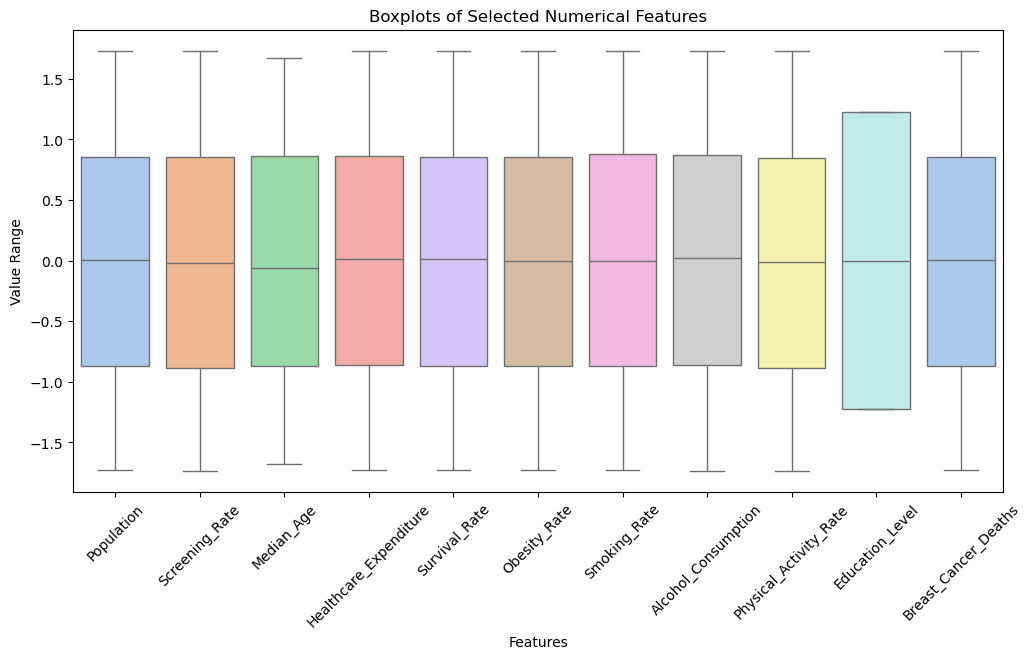

In [41]:
print("Displaying boxplots for selected numerical features...")

plt.figure(figsize=(12, 6))


sns.boxplot(data=df_sample[selected_columns], palette="pastel")  

plt.xticks(rotation=45)  
plt.title("Boxplots of Selected Numerical Features")
plt.ylabel("Value Range")
plt.xlabel("Features")
plt.show()


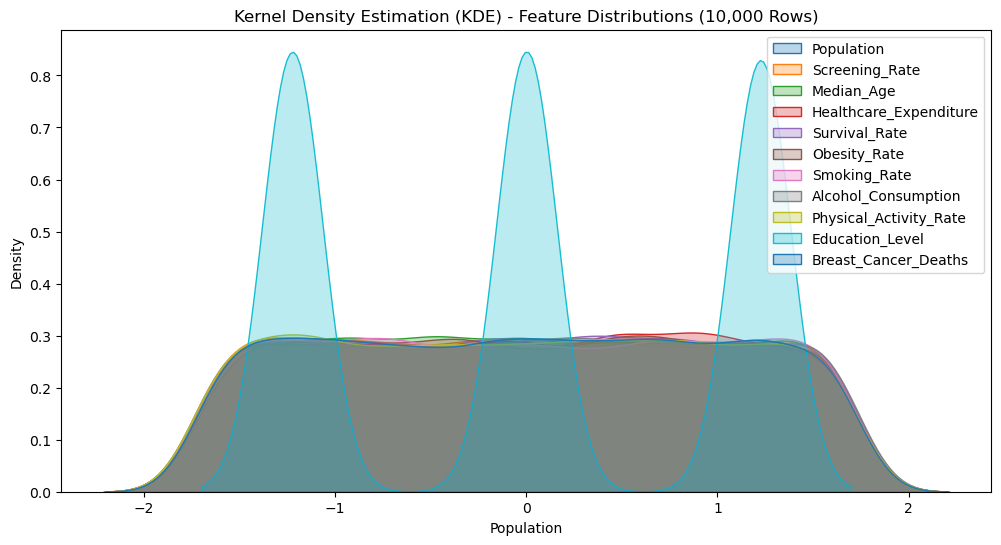

In [43]:
plt.figure(figsize=(12, 6))
for col in df_sample[selected_columns].columns:
    sns.kdeplot(df_sample[col], label=col, fill=True, alpha=0.3)
plt.title("Kernel Density Estimation (KDE) - Feature Distributions (10,000 Rows)")
plt.legend()
plt.show()

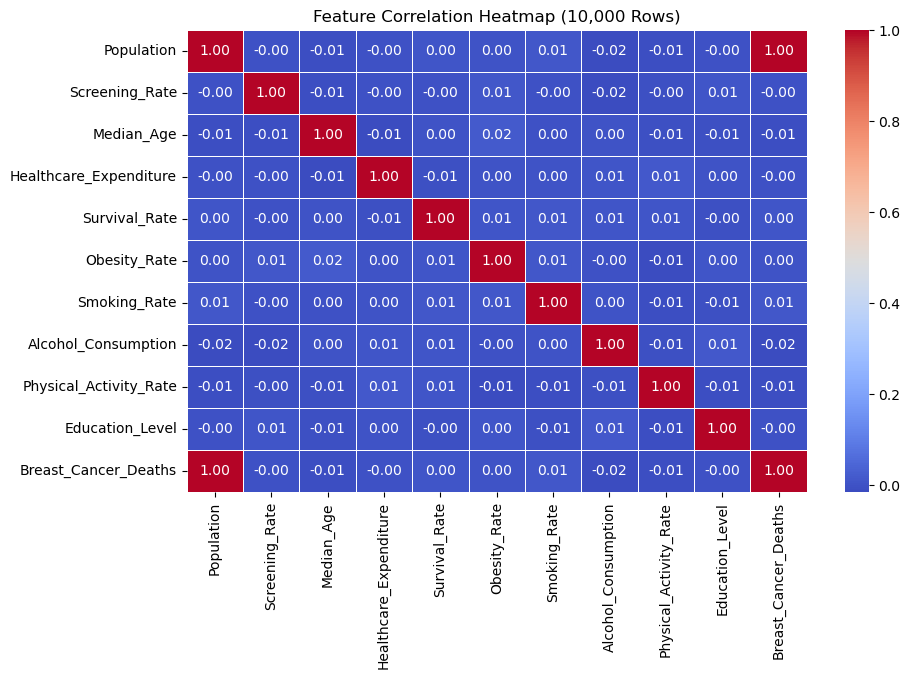

In [45]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_sample[selected_columns].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap (10,000 Rows)")
plt.show()

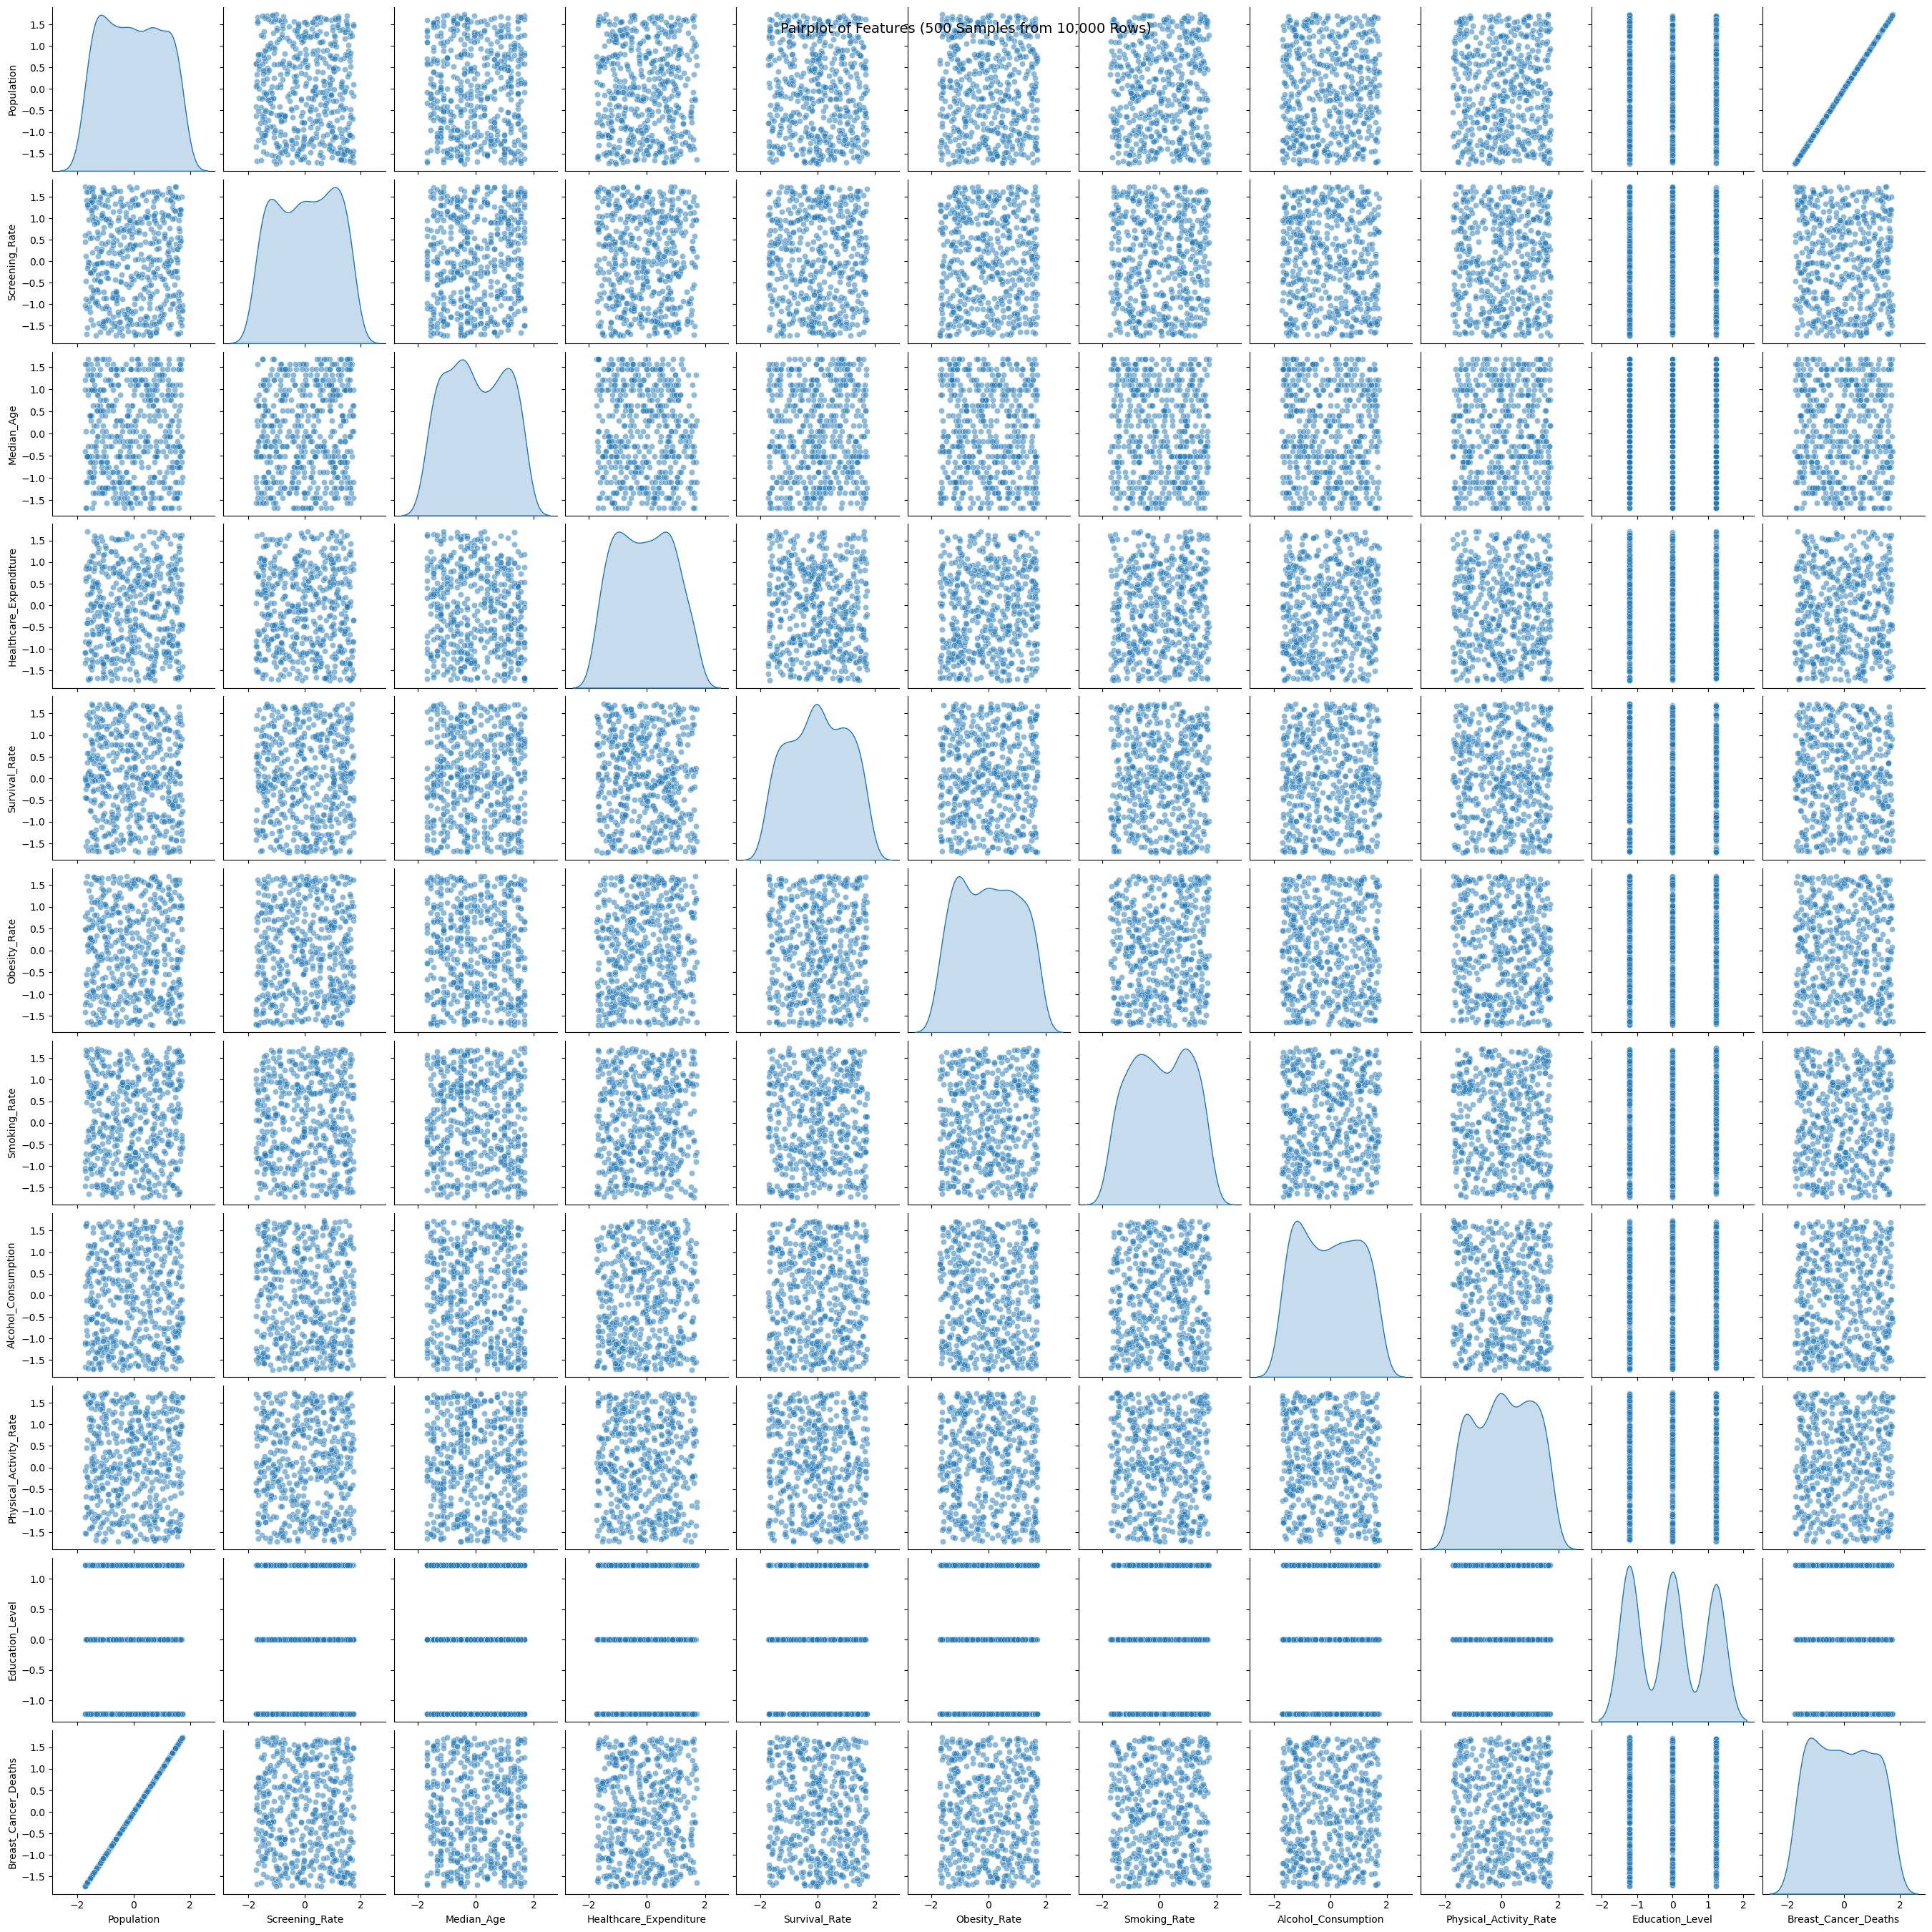

In [47]:
sns.pairplot(df_sample[selected_columns].sample(500), diag_kind="kde", plot_kws={'alpha':0.5})
plt.suptitle("Pairplot of Features (500 Samples from 10,000 Rows)", fontsize=14)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [35]:
X = df[selected_columns].drop(columns=["Breast_Cancer_Deaths"])  
y = df["Breast_Cancer_Deaths"]  


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "Support Vector Regression": SVR(kernel="linear"),
    "Decision Tree": DecisionTreeRegressor(random_state=42)
    }

In [43]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    
    mse = mean_squared_error(y_test, y_pred) 
    r2 = r2_score(y_test, y_pred) 
    
    results[name] = {"MSE": mse, "R² Score": r2}


In [45]:
for model, scores in results.items():
    print(f"{model}: MSE = {scores['MSE']:.4f}, R² Score = {scores['R² Score']:.4f}")

Linear Regression: MSE = 0.0000, R² Score = 1.0000
Lasso Regression: MSE = 0.0100, R² Score = 0.9900
Ridge Regression: MSE = 0.0000, R² Score = 1.0000
Support Vector Regression: MSE = 0.0033, R² Score = 0.9967
Decision Tree: MSE = 0.0000, R² Score = 1.0000


In [47]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, explained_variance_score


In [49]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    
    return {"MSE": mse, "R² Score": r2, "MAE": mae, "MAPE": mape, "Explained Variance": evs}


In [51]:
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)


Training Linear Regression...
Training Lasso Regression...
Training Ridge Regression...
Training Support Vector Regression...
Training Decision Tree...


In [53]:
print("\nModel Performance:")
for model, scores in results.items():
    print(f"\n{model}:")
    for metric, value in scores.items():
        print(f"  {metric}: {value:.4f}")


Model Performance:

Linear Regression:
  MSE: 0.0000
  R² Score: 1.0000
  MAE: 0.0000
  MAPE: 0.0011
  Explained Variance: 1.0000

Lasso Regression:
  MSE: 0.0100
  R² Score: 0.9900
  MAE: 0.0865
  MAPE: 0.1009
  Explained Variance: 0.9900

Ridge Regression:
  MSE: 0.0000
  R² Score: 1.0000
  MAE: 0.0000
  MAPE: 0.0011
  Explained Variance: 1.0000

Support Vector Regression:
  MSE: 0.0033
  R² Score: 0.9967
  MAE: 0.0500
  MAPE: 0.0618
  Explained Variance: 0.9967

Decision Tree:
  MSE: 0.0000
  R² Score: 1.0000
  MAE: 0.0000
  MAPE: 0.0004
  Explained Variance: 1.0000


In [55]:
from sklearn.metrics import r2_score


In [57]:
def accuracy_within_tolerance(y_true, y_pred, tolerance=0.10):
    correct_predictions = np.abs((y_pred - y_true) / y_true) <= tolerance
    accuracy = np.mean(correct_predictions) * 100 
    return accuracy


In [59]:
accuracy_results = {}


In [61]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_within_tolerance(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    accuracy_results[name] = {"Accuracy": accuracy, "R² Score": r2}


Training Linear Regression...
Training Lasso Regression...
Training Ridge Regression...
Training Support Vector Regression...
Training Decision Tree...


In [63]:
print("\nModel Accuracy:")
for model, scores in accuracy_results.items():
    print(f"{model}: Accuracy = {scores['Accuracy']:.2f}%, R² Score = {scores['R² Score']:.4f}")


Model Accuracy:
Linear Regression: Accuracy = 99.99%, R² Score = 1.0000
Lasso Regression: Accuracy = 82.46%, R² Score = 0.9900
Ridge Regression: Accuracy = 99.99%, R² Score = 1.0000
Support Vector Regression: Accuracy = 99.92%, R² Score = 0.9967
Decision Tree: Accuracy = 100.00%, R² Score = 1.0000
